In [1]:
!pip install -q  kaggle
! gdown --id 1Kr1QJBppA2sGA5hw5jvSpKlen9Yt3tEl

Downloading...
From: https://drive.google.com/uc?id=1Kr1QJBppA2sGA5hw5jvSpKlen9Yt3tEl
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 53.7kB/s]


In [2]:
mkdir ~/.kaggle

In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d akash14/house-price-dataset
!unzip house-price-dataset.zip

  0% 0.00/2.13M [00:00<?, ?B/s]
100% 2.13M/2.13M [00:00<00:00, 70.1MB/s]
Archive:  house-price-dataset.zip
  inflating: Participants_Data_HPP/Test.csv  
  inflating: Participants_Data_HPP/Train.csv  
  inflating: Participants_Data_HPP/sample_submission.csv  


Importing libraries 


In [5]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [6]:
df = pd.read_csv('/content/Participants_Data_HPP/Train.csv')
df_test = pd.read_csv('/content/Participants_Data_HPP/Test.csv')
print('The shape of dataset is {}'.format(df.shape))
df.head()

The shape of dataset is (29451, 12)


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


Data Cleaning :

In [7]:
df_test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [8]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [9]:
df = df[(df['TARGET(PRICE_IN_LACS)']<15000) & 
        (df['SQUARE_FT']<300000) & (df['BHK_NO.']<=6)]

print('Shape of the dataset after neglecting the outliers {}'.format(df.shape))

Shape of the dataset after neglecting the outliers (29401, 12)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29401 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29401 non-null  object 
 1   UNDER_CONSTRUCTION     29401 non-null  int64  
 2   RERA                   29401 non-null  int64  
 3   BHK_NO.                29401 non-null  int64  
 4   BHK_OR_RK              29401 non-null  object 
 5   SQUARE_FT              29401 non-null  float64
 6   READY_TO_MOVE          29401 non-null  int64  
 7   RESALE                 29401 non-null  int64  
 8   ADDRESS                29401 non-null  object 
 9   LONGITUDE              29401 non-null  float64
 10  LATITUDE               29401 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29401 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [11]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29401.000000,29401.000000,29401.000000,29401.000000,29401.000000,29401.000000,29401.000000,29401.000000,29401.000000
mean,0.179926,0.318391,2.380633,1817.975963,0.820074,0.929458,21.304478,76.836398,139.278117
std,0.384132,0.465860,0.809916,8081.684937,0.384132,0.256062,6.204619,10.565609,592.386511
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,900.016364,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1174.488076,1.000000,1.000000,20.750000,77.324137,61.900000
75%,0.000000,1.000000,3.000000,1550.169109,1.000000,1.000000,26.900926,77.820000,100.000000
max,1.000000,1.000000,6.000000,246008.783300,1.000000,1.000000,59.912884,152.962676,9990.000000


Clustering :

Passing long-form data and assigning x and y will draw a scatter plot between two variables:

Pass the name of a categorical palette or explicit colors (as a Python list of dictionary) to force categorical mapping of the hue variable:

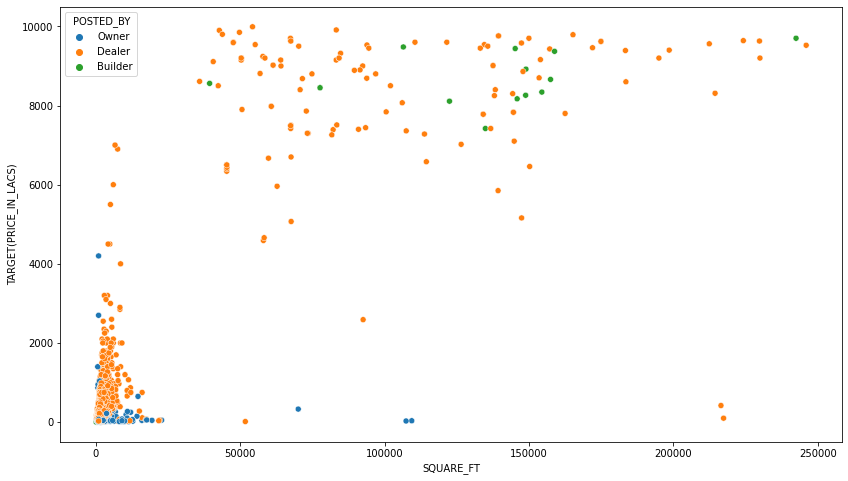

In [12]:
plt.figure(figsize=(14,8))

sns.scatterplot(data = df ,x= df.SQUARE_FT,y= df['TARGET(PRICE_IN_LACS)'],hue = df['POSTED_BY'])

The number of clusters to form as well as the number of centroids to generate.

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['SQUARE_FT','TARGET(PRICE_IN_LACS)']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [14]:
df['cluster']=y_predicted
df.head(95)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),cluster
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Dealer,0,0,3,BHK,1118.750000,1,1,"Medavakkam,Chennai",12.917160,80.192870,53.7,0
91,Dealer,0,1,2,BHK,889.830509,1,1,"Sector-137 Noida,Noida",28.506454,77.409568,42.0,0
92,Owner,0,0,3,BHK,2738.225630,1,1,"Basapura,Bangalore",12.863421,77.652405,150.0,0
93,Dealer,1,1,4,BHK,1725.490196,0,0,"Deonar,Maharashtra",19.049513,72.919204,440.0,0


Centroids Of cluster 

In [15]:
km.cluster_centers_

array([[1.31912642e+03, 1.01352834e+02],
       [1.62449101e+05, 8.36838889e+03],
       [6.98898940e+04, 7.78665517e+03]])



y_kmeans give us different clusters corresponding to X. Now let’s plot all the clusters using matplotlib.

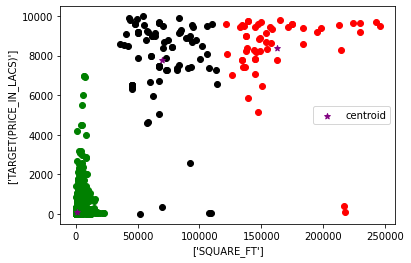

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['SQUARE_FT'],df1['TARGET(PRICE_IN_LACS)'],color='green')
plt.scatter(df2['SQUARE_FT'],df2['TARGET(PRICE_IN_LACS)'],color='red')
plt.scatter(df3['SQUARE_FT'],df3['TARGET(PRICE_IN_LACS)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel(['SQUARE_FT'])
plt.ylabel(['TARGET(PRICE_IN_LACS)'])
plt.legend()

In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['TARGET(PRICE_IN_LACS)']])
df['TARGET(PRICE_IN_LACS)'] = scaler.transform(df[['TARGET(PRICE_IN_LACS)']])

scaler.fit(df[['SQUARE_FT']])
df['SQUARE_FT.'] = scaler.transform(df[['SQUARE_FT']])

Assigning a variable to hue will map its levels to the color of the points:

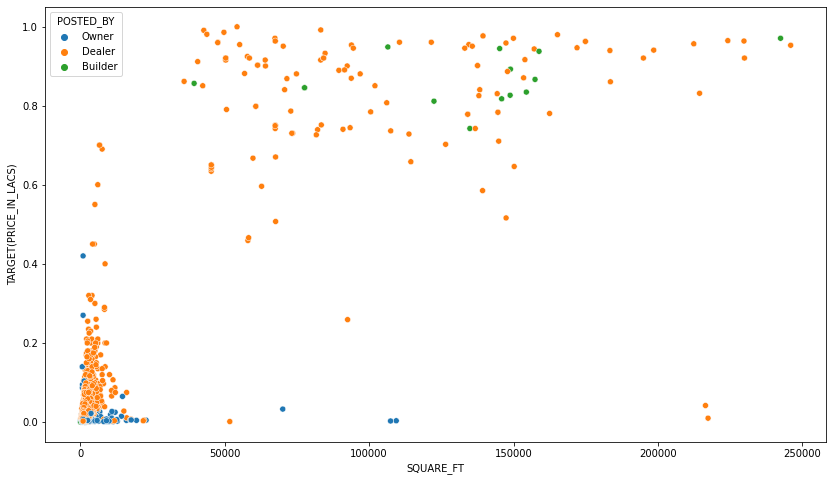

In [18]:
plt.figure(figsize=(14,8))

sns.scatterplot(data = df ,x= df.SQUARE_FT,y= df['TARGET(PRICE_IN_LACS)'],hue = df['POSTED_BY'])

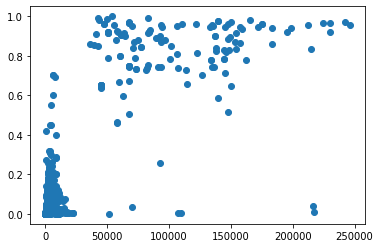

In [19]:
plt.scatter(df.SQUARE_FT,df['TARGET(PRICE_IN_LACS)'])

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['SQUARE_FT','TARGET(PRICE_IN_LACS)']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
df['cluster']=y_predicted
df.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),cluster,SQUARE_FT.
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,0.005481,0,0.005273
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,0.005080,0,0.005171
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,0.004279,0,0.003781
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,0.006231,0,0.003768
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,0.006031,0,0.004049
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,0.004179,0,0.005069
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,0.006632,0,0.006065
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,0.005180,0,0.004789
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,0.004139,0,0.004215
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,0.003579,0,0.003561


In [22]:
km.cluster_centers_

array([[1.31912642e+03, 1.01206570e-02],
       [1.62449101e+05, 8.37672503e-01],
       [6.98898940e+04, 7.79439443e-01]])

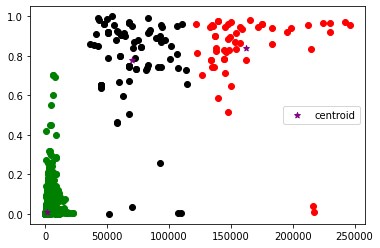

In [23]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['SQUARE_FT'],df1['TARGET(PRICE_IN_LACS)'],color='green')
plt.scatter(df2['SQUARE_FT'],df2['TARGET(PRICE_IN_LACS)'],color='red')
plt.scatter(df3['SQUARE_FT'],df3['TARGET(PRICE_IN_LACS)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [24]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SQUARE_FT','TARGET(PRICE_IN_LACS)']])
    sse.append(km.inertia_)

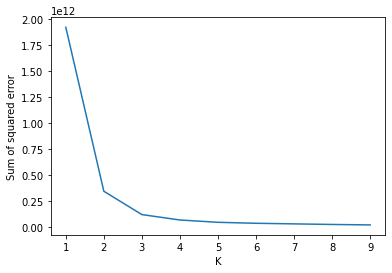

In [25]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)